In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import pickle
import os
import random
from tqdm import tqdm

In [6]:
# keras
import keras
from keras import optimizers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalMaxPool2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from livelossplot import PlotLossesKeras
from keras_sequential_ascii import keras2ascii

In [7]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [8]:
import seaborn as sn
sn.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 12})
pd.set_option('display.max_columns', 2000)

In [9]:
train_path = "notMNIST_large"
test_path = "notMNIST_small"

In [10]:
X_features = pickle.load(open("X_features.pickle","rb"))
Y_label = pickle.load(open("Y_labels.pickle","rb"))

In [11]:
X_features = np.array(X_features) / 255 # normalization of data for easy to calculations.
Y_label = np.array(Y_label)

In [12]:
resolution = 28
classes = 10

In [13]:
X_features = X_features.reshape((-1, resolution, resolution, 1))
Y_labels = np_utils.to_categorical(Y_label, 10)

In [14]:
TRAIN = 200000
VAL = 10000
TEST = 19000

In [15]:
x_train, y_train = X_features[:TRAIN], Y_labels[:TRAIN]
x_val, y_val = X_features[TRAIN:TRAIN+VAL], Y_labels[TRAIN:TRAIN+VAL]
x_test, y_test = X_features[TRAIN+VAL:TRAIN+VAL+TEST], Y_labels[TRAIN+VAL:TRAIN+VAL+TEST]

In [16]:
x_test, y_test = X_features[TRAIN+VAL:TRAIN+VAL+TEST], Y_label[TRAIN+VAL:TRAIN+VAL+TEST]

In [17]:
print('Train: ',x_train.shape, y_train.shape)
print('Validation: ', x_val.shape, y_val.shape)
print('Test: ', x_test.shape, y_test.shape)

Train:  (200000, 28, 28, 1) (200000, 10)
Validation:  (10000, 28, 28, 1) (10000, 10)
Test:  (19000, 28, 28, 1) (19000,)


### Models

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     28   28    1
              Conv2D    \|/  -------------------       320     0.1%
                relu   #####     26   26   32
              Conv2D    \|/  -------------------     18496     4.8%
                relu   #####     24   24   64
             Flatten   ||||| -------------------         0     0.0%
                       #####       36864
               Dense   XXXXX -------------------    368650    95.1%
             softmax   #####          10


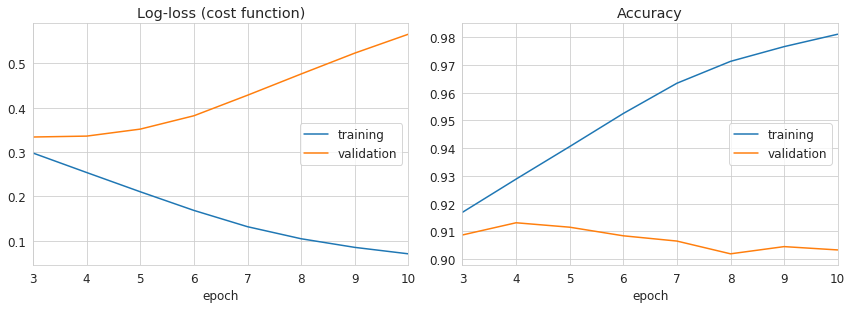

Log-loss (cost function):
training   (min:    0.070, max:    0.442, cur:    0.070)
validation (min:    0.334, max:    0.565, cur:    0.565)

Accuracy:
training   (min:    0.879, max:    0.981, cur:    0.981)
validation (min:    0.899, max:    0.913, cur:    0.903)


In [23]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_data=(x_val, y_val),
          callbacks=[PlotLossesKeras()],
          verbose=1)

In [26]:
y_pred = model.predict_classes(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

Accuracy: 0.9021578947368422
F1: 0.9022237317276522


array([[1585,   26,   14,   22,   17,   23,   15,   45,   29,   17],
       [  19, 1681,   13,   41,   51,   22,   14,   29,   30,   17],
       [   4,   15, 1778,    9,   61,   21,   39,    8,   17,   10],
       [  11,   29,   15, 1694,   21,   16,   10,    9,   20,   28],
       [  12,   13,   37,    8, 1777,   22,   26,   11,   21,    8],
       [   9,   12,   17,   10,   52, 1751,   19,   21,   20,   19],
       [  13,   18,   45,   21,   40,   19, 1684,   14,   23,   12],
       [  20,   20,    5,   14,   18,   14,   15, 1681,   23,   16],
       [  13,   21,   20,   29,   27,   14,   13,   25, 1740,   52],
       [  11,   11,   10,   22,   21,   22,    9,   17,   48, 1770]])

In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
keras2ascii(model)


           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     28   28    1
              Conv2D    \|/  -------------------       320     0.6%
                relu   #####     26   26   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     13   13   32
             Flatten   ||||| -------------------         0     0.0%
                       #####        5408
               Dense   XXXXX -------------------     54090    99.4%
             softmax   #####          10


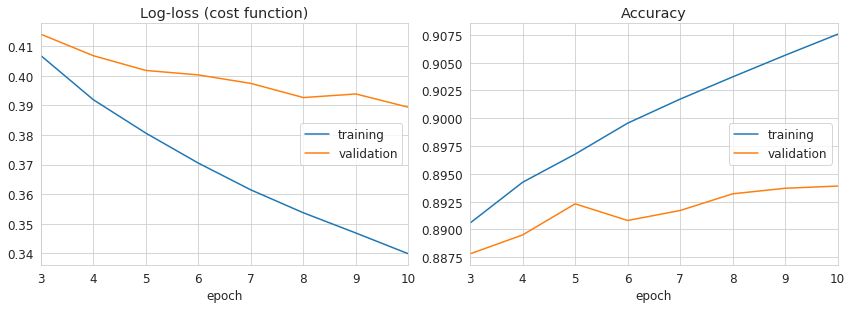

Log-loss (cost function):
training   (min:    0.340, max:    0.527, cur:    0.340)
validation (min:    0.389, max:    0.457, cur:    0.389)

Accuracy:
training   (min:    0.858, max:    0.908, cur:    0.908)
validation (min:    0.876, max:    0.894, cur:    0.894)


In [29]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_data=(x_val, y_val),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [30]:
y_pred = model.predict_classes(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

Accuracy: 0.8964736842105263
F1: 0.8966734894771725


array([[1621,   15,   11,   29,    7,   12,   21,   33,   33,   11],
       [  26, 1685,    8,   39,   25,   11,   33,   38,   39,   13],
       [  11,   15, 1776,    9,   23,   16,   67,    8,   29,    8],
       [  32,   24,    4, 1695,    6,    9,   12,   17,   28,   26],
       [  24,   34,   47,   15, 1681,   32,   41,   17,   41,    3],
       [  19,   17,   12,   12,   14, 1744,   30,   26,   42,   14],
       [  14,   22,   29,   21,   11,   14, 1720,   16,   26,   16],
       [  37,   25,    4,   19,    8,   17,   23, 1657,   31,    5],
       [  23,   21,   14,   20,   14,   14,   22,   33, 1720,   73],
       [  20,   13,    1,   29,   10,   18,   15,   21,   80, 1734]])

Lenet5

In [38]:
model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='tanh', input_shape=(resolution, resolution, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(filters=120, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='tanh'))

model.add(Flatten())

model.add(Dense(units=84, activation='tanh'))

model.add(Dense(units=classes, activation = 'softmax'))

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
EPOCHS = 50
BATCH_SIZE = 256

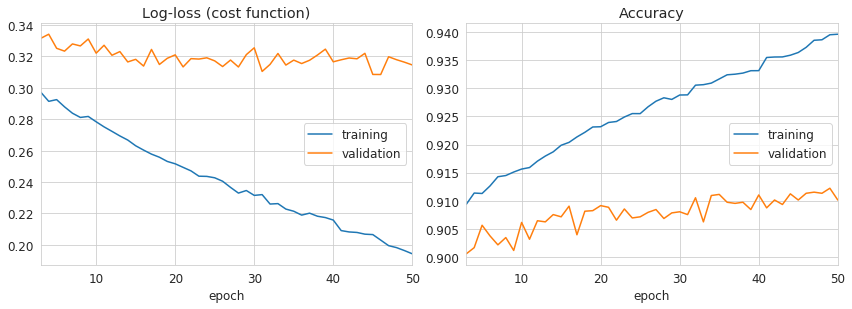

Log-loss (cost function):
training   (min:    0.194, max:    0.308, cur:    0.194)
validation (min:    0.308, max:    0.337, cur:    0.314)

Accuracy:
training   (min:    0.907, max:    0.940, cur:    0.940)
validation (min:    0.898, max:    0.912, cur:    0.910)


In [43]:
model.fit(x_train, y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=(x_val, y_val),
          callbacks=[PlotLossesKeras()],
          verbose=1)

In [45]:
y_pred = model.predict_classes(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

Accuracy: 0.9113684210526316
F1: 0.9113900645439705


array([[1667,   20,   11,   17,   10,    9,    7,   31,   15,    6],
       [  27, 1727,   22,   31,   21,    8,   19,   29,   25,    8],
       [  10,   12, 1825,    7,   24,   14,   33,   14,   15,    8],
       [  27,   36,   15, 1694,   10,    8,   10,   11,   22,   20],
       [  16,   31,   35,   13, 1761,   17,   24,   11,   22,    5],
       [  13,   10,   15,   24,   28, 1752,   29,   22,   31,    6],
       [  14,   28,   46,   14,   21,   16, 1701,   16,   21,   12],
       [  30,   16,    9,   13,   13,    8,   15, 1691,   22,    9],
       [  15,   21,   26,   27,   25,   17,   16,   20, 1749,   38],
       [  22,    8,   17,   26,   16,   19,    9,   25,   50, 1749]])